In [1]:
!pwd

/home/dodo/projects/aDNA_Comparative_Analysis/notebooks


# Example analysis using the EIGENSOFT package
## We'll follow these steps:

* Setup and Configuration: Ensure that all necessary files and configurations are in place.
* File Conversion: Use convertf to convert example data into the required format.
* PCA Analysis: Use smartpca to perform Principal Components Analysis (PCA).
* Plotting Results: Use ploteig to visualize the results of PCA.

In [2]:
import os
import subprocess


In [3]:
# Define the paths
base_dir = os.path.abspath("../EIG")
out_dir = os.path.abspath("../output")
bin_dir = os.path.join(base_dir, "bin")
convertf_dir = os.path.join(base_dir, "CONVERTF")
eigenstrat_dir = os.path.join(base_dir, "EIGENSTRAT")
notebook_dir = os.getcwd()

# Define the output directory for EIGENSOFT analysis
output_dir = os.path.join(out_dir, "EIG_output")
os.makedirs(output_dir, exist_ok=True)

# Set environment variables to ensure consistency
os.environ['PATH'] = bin_dir + os.pathsep + os.environ['PATH']
# File paths for the parameter files
convertf_par_file = os.path.join(notebook_dir, "par.ANCESTRYMAP.EIGENSTRAT")
smartpca_par_file = os.path.join(notebook_dir, "par.smartpca")
smarteigenstrat_par_file = os.path.join(output_dir, "example.chisq.par")


In [4]:
# Write the convertf parameter file
with open(convertf_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(convertf_dir, "example.ancestrymapgeno")}
snpname:         {os.path.join(convertf_dir, "example.snp")}
indivname:       {os.path.join(convertf_dir, "example.ind")}
outputformat:    EIGENSTRAT
genooutfilename: {os.path.join(output_dir, "example.eigenstratgeno")}
snpoutfilename:  {os.path.join(output_dir, "example.snp")}
indoutfilename:  {os.path.join(output_dir, "example.ind")}""")

# Write the smartpca parameter file
with open(smartpca_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(output_dir, "example.eigenstratgeno")}
snpname:         {os.path.join(output_dir, "example.snp")}
indivname:       {os.path.join(output_dir, "example.ind")}
evecoutname:     {os.path.join(output_dir, "example.pca.evec")}
evaloutname:     {os.path.join(output_dir, "example.pca.eval")}
numoutevec:      5""")

# Write the smarteigenstrat parameter file
with open(smarteigenstrat_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(output_dir, "example.eigenstratgeno")}
snpname:         {os.path.join(output_dir, "example.snp")}
indivname:       {os.path.join(output_dir, "example.ind")}
pcaname:         {os.path.join(output_dir, "example.pca.evec")}
outputname:      {os.path.join(output_dir, "example.chisq")}
numeigs:         5
qtmode:          NO""")
    

In [5]:
# Function to run a command and capture its output
def run_command(command):
    try:
        result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
        print(result.stdout)
        print(result.stderr)
    except subprocess.CalledProcessError as e:
        print(f"Error running command: {e}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.output}")
        print(f"Stderr: {e.stderr}")
        raise
    

In [6]:
# Run convertf
convertf_command = f"{os.path.join(bin_dir, 'convertf')} -p {convertf_par_file}"
run_command(convertf_command)


parameter file: /home/dodo/projects/aDNA_Comparative_Analysis/notebooks/par.ANCESTRYMAP.EIGENSTRAT
genotypename: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/CONVERTF/example.ancestrymapgeno
snpname: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/CONVERTF/example.snp
indivname: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/CONVERTF/example.ind
outputformat: EIGENSTRAT
genooutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.eigenstratgeno
snpoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.snp
indoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.ind
## /home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/convertf version: 5000
numvalidind:      5  maxmiss:  5001
eigenstrat output
##end of convertf run




In [7]:
# Run smartpca
smartpca_command = f"{os.path.join(bin_dir, 'smartpca')} -p {smartpca_par_file} > {os.path.join(output_dir, 'smartpca.log')}"
run_command(smartpca_command)


In [8]:
# # Run smarteigenstrat with the parameter file
# smarteigenstrat_command = f"{os.path.join(bin_dir, 'smarteigenstrat')} -p {smarteigenstrat_par_file} > {os.path.join(output_dir, 'smarteigenstrat.log')}"
# run_command(smarteigenstrat_command)

# # TODO: Run smarteigenstrat with the parameter file and correct the error

In [9]:
# Output completion message
print("Analysis complete. Check the generated files in the EIG_output directory.")



Analysis complete. Check the generated files in the EIG_output directory.


In [10]:
# Output completion message
print("Analysis complete. Check the generated files in the EIG_output directory.")


Analysis complete. Check the generated files in the EIG_output directory.


# Example Analysis Using the EIGENSOFT Package

## Overview

This analysis will guide you through the process of using the EIGENSOFT package to perform a comprehensive genetic data analysis. We will cover setting up and configuring the environment, converting data formats, performing Principal Components Analysis (PCA), and visualizing the results. Each step is crucial to ensure accurate and meaningful analysis of the genetic data.

## Steps

### 1. Setup and Configuration

Before starting the analysis, we need to ensure that all necessary files and configurations are in place. This includes setting up the directories, defining paths, and preparing the environment variables.

### 2. File Conversion

The first computational step involves converting the example data into the required format using the `convertf` tool. This tool is part of the EIGENSOFT package and helps in transforming various genetic data formats into the EIGENSTRAT format, which is necessary for subsequent analysis steps.

### 3. PCA Analysis

Once the data is converted, we will perform Principal Components Analysis (PCA) using the `smartpca` tool. PCA is a statistical technique used to emphasize variation and bring out strong patterns in a dataset. It reduces the dimensionality of the data while preserving as much variability as possible.

### 4. Plotting Results

After performing PCA, visualizing the results is crucial for interpreting the data. We use `ploteig`, a utility that generates plots of the top principal components, making it easier to understand the genetic variation and structure within the dataset.

## Detailed Steps

### Setup and Configuration

1. **Define Paths and Directories**: Set up the paths for the EIGENSOFT package, input data, and output directories.
2. **Set Environment Variables**: Ensure that the PATH environment variable includes the directory with EIGENSOFT binaries.
3. **Create Output Directory**: Create an output directory where all the results and logs will be stored.




In [11]:
import os
import subprocess

# Define the paths
base_dir = os.path.abspath("../EIG")
out_dir = os.path.abspath("../output")
bin_dir = os.path.join(base_dir, "bin")
convertf_dir = os.path.join(base_dir, "CONVERTF")
eigenstrat_dir = os.path.join(base_dir, "EIGENSTRAT")
notebook_dir = os.getcwd()

# Define the output directory for EIGENSOFT analysis
output_dir = os.path.join(out_dir, "EIG_output")
os.makedirs(output_dir, exist_ok=True)

# Set environment variables to ensure consistency
os.environ['PATH'] = bin_dir + os.pathsep + os.environ['PATH']

## File Conversion

Convert the example data files into the EIGENSTRAT format using the convertf tool. Create a parameter file for convertf specifying the input and output file paths.

In [12]:
# File paths for the parameter files
convertf_par_file = os.path.join(notebook_dir, "par.ANCESTRYMAP.EIGENSTRAT")

# Write the convertf parameter file
with open(convertf_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(convertf_dir, "example.ancestrymapgeno")}
snpname:         {os.path.join(convertf_dir, "example.snp")}
indivname:       {os.path.join(convertf_dir, "example.ind")}
outputformat:    EIGENSTRAT
genooutfilename: {os.path.join(output_dir, "example.eigenstratgeno")}
snpoutfilename:  {os.path.join(output_dir, "example.snp")}
indoutfilename:  {os.path.join(output_dir, "example.ind")}""")

# Run convertf
convertf_command = os.path.join(bin_dir, "convertf") + " -p " + convertf_par_file
subprocess.run(convertf_command, shell=True, check=True)


parameter file: /home/dodo/projects/aDNA_Comparative_Analysis/notebooks/par.ANCESTRYMAP.EIGENSTRAT
genotypename: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/CONVERTF/example.ancestrymapgeno
snpname: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/CONVERTF/example.snp
indivname: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/CONVERTF/example.ind
outputformat: EIGENSTRAT
genooutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.eigenstratgeno
snpoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.snp
indoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.ind
## /home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/convertf version: 5000
numvalidind:      5  maxmiss:  5001
eigenstrat output
##end of convertf run


CompletedProcess(args='/home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/convertf -p /home/dodo/projects/aDNA_Comparative_Analysis/notebooks/par.ANCESTRYMAP.EIGENSTRAT', returncode=0)

## PCA Analysis

Perform PCA using the smartpca tool. Create a parameter file for smartpca specifying the input and output file paths.

In [13]:
# File paths for the parameter files
smartpca_par_file = os.path.join(notebook_dir, "par.smartpca")

# Write the smartpca parameter file
with open(smartpca_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(output_dir, "example.eigenstratgeno")}
snpname:         {os.path.join(output_dir, "example.snp")}
indivname:       {os.path.join(output_dir, "example.ind")}
evecoutname:     {os.path.join(output_dir, "example.pca.evec")}
evaloutname:     {os.path.join(output_dir, "example.pca.eval")}
numoutevec:      10""")

# Run smartpca
smartpca_command = os.path.join(bin_dir, "smartpca") + " -p " + smartpca_par_file + " > " + os.path.join(output_dir, "smartpca.log")
subprocess.run(smartpca_command, shell=True, check=True)


CompletedProcess(args='/home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/smartpca -p /home/dodo/projects/aDNA_Comparative_Analysis/notebooks/par.smartpca > /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/smartpca.log', returncode=0)

# Plotting Results

Visualize the PCA results using ploteig or a custom Python script with matplotlib. If using ploteig, you can create a plot of the principal components directly. If using Python, read the PCA results from the .evec file and create a scatter plot.

In [14]:
!pwd

/home/dodo/projects/aDNA_Comparative_Analysis/notebooks


Using ploteig

In [15]:
!ploteig -i ../EIG/EIGENSTRAT/example.pca.evec -c 1:2 -p Case:Control -x -y -o ../EIG/EIGENSTRAT/example.plot.xtxt


/bin/bash: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/ploteig: /usr/local/bin/perl: bad interpreter: No such file or directory


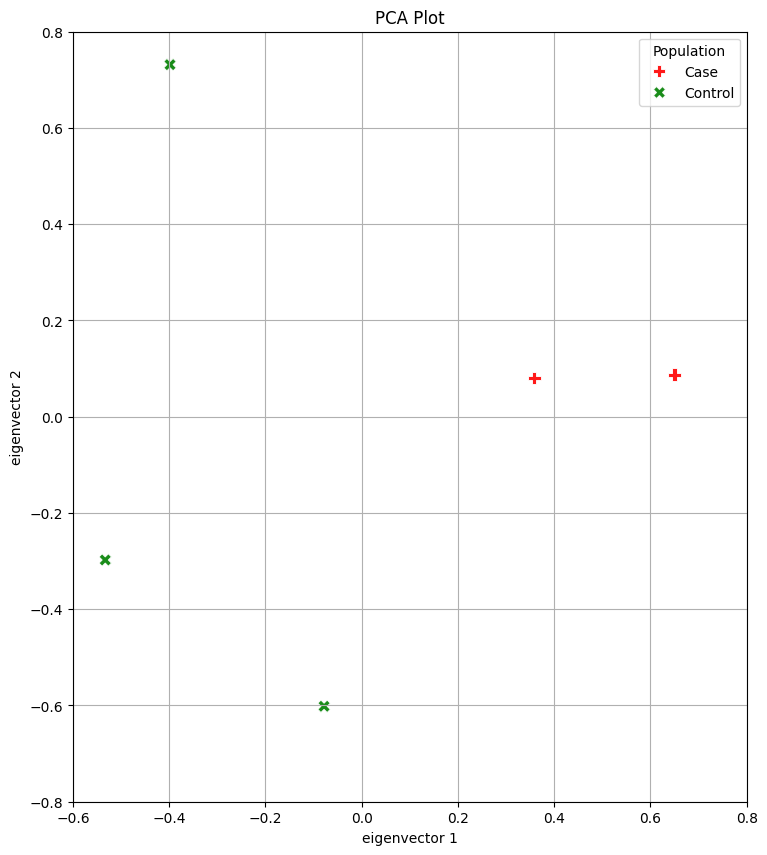

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the files
evec_file = '../EIG/EIGENSTRAT/example.pca.evec'
ind_file = '../EIG/EIGENSTRAT/example.ind'

# Read the .evec file, skipping the first line and handling whitespace issues
with open(evec_file, 'r') as f:
    lines = f.readlines()

# Skip the first line and split remaining lines into columns
data = []
for line in lines[1:]:
    parts = line.split()
    sample = parts[0]
    pcs = list(map(float, parts[1:-1]))
    population = parts[-1]
    data.append([sample] + pcs + [population])

# Create a DataFrame from the parsed data
columns = ['Sample'] + [f'PC{i}' for i in range(1, len(data[0]) - 1)] + ['Population']
evec_df = pd.DataFrame(data, columns=columns)

# Read the .ind file to get the population information
with open(ind_file, 'r') as f:
    lines = f.readlines()

# Parse the .ind file similarly
ind_data = []
for line in lines:
    parts = line.split()
    sample = parts[0]
    sex = parts[1]
    population = parts[2]
    ind_data.append([sample, sex, population])

# Create a DataFrame from the parsed .ind data
ind_df = pd.DataFrame(ind_data, columns=['Sample', 'Sex', 'Population'])

# Merge the DataFrames on the Sample column
merged_df = pd.merge(evec_df, ind_df[['Sample', 'Population']], on='Sample')

# Drop one of the duplicate Population columns
merged_df = merged_df.drop(columns=['Population_y']).rename(columns={'Population_x': 'Population'})

# Correcting the inversion by multiplying the principal components by -1
merged_df[['PC1', 'PC2']] = merged_df[['PC1', 'PC2']] * -1

# Plot the first two principal components using Seaborn
plt.figure(figsize=(10, 10))

# Adjusting the axis limits and markers to match the example plot
sns.scatterplot(
    data=merged_df, 
    x='PC1', 
    y='PC2', 
    hue='Population', 
    style='Population', 
    markers={'Case': 'P', 'Control': 'X'}, 
    s=80, 
    alpha=0.9, 
    palette={'Case': 'red', 'Control': 'green'}
)

plt.xlabel('eigenvector 1')
plt.ylabel('eigenvector 2')
plt.title('PCA Plot')
plt.legend(title='Population', loc='upper right')
plt.grid(True)
plt.xlim(-0.6, 0.8)
plt.ylim(-0.8, 0.8)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# AADR DATA

In [29]:
import os
import struct

# Define the paths
data_dir = os.path.abspath("../data/aadr/dataverse_files")
output_dir = os.path.abspath("../output/EIG_output")
os.makedirs(output_dir, exist_ok=True)

# Input file paths
geno_file = os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.geno")
snp_file = os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.snp")
ind_file = os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.ind")

# Output file paths
short_geno_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.geno")
short_snp_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.snp")
short_ind_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.ind")

# Number of SNPs and individuals to keep
n_snps = 50
n_individuals = 50

# Shorten the .geno file
with open(geno_file, 'rb') as infile, open(short_geno_file, 'wb') as outfile:
    # Read and write the header
    header = infile.read(16)
    outfile.write(header)
    
    # Process each SNP
    for _ in range(n_snps):
        snp_data = infile.read(n_individuals)
        if not snp_data:
            break
        outfile.write(snp_data)

print(f"Created shortened geno file: {short_geno_file}")

# Shorten the .snp file
with open(snp_file, 'r') as infile, open(short_snp_file, 'w') as outfile:
    for i, line in enumerate(infile):
        if i >= n_snps:
            break
        outfile.write(line)

print(f"Created shortened snp file: {short_snp_file}")

# Shorten the .ind file
with open(ind_file, 'r') as infile, open(short_ind_file, 'w') as outfile:
    for i, line in enumerate(infile):
        if i >= n_individuals:
            break
        outfile.write(line)

print(f"Created shortened ind file: {short_ind_file}")

# Update the header of the shortened .geno file
with open(short_geno_file, 'r+b') as f:
    header = struct.unpack('4I', f.read(16))
    new_header = struct.pack('4I', header[0], n_individuals, n_snps, header[3])
    f.seek(0)
    f.write(new_header)

print("Updated header of shortened geno file")

Created shortened geno file: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.geno
Created shortened snp file: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.snp
Created shortened ind file: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.ind
Updated header of shortened geno file


In [ ]:
# import os
# import subprocess

# # Define the paths
# base_dir = os.path.abspath("../EIG")
# data_dir = os.path.abspath("../data/aadr/dataverse_files")
# output_dir = os.path.abspath("../output/EIG_output")
# bin_dir = os.path.join(base_dir, "bin")
# os.makedirs(output_dir, exist_ok=True)

# # Set environment variables to ensure consistency
# os.environ['PATH'] = bin_dir + os.pathsep + os.environ['PATH']

# # File paths for the parameter files
# convertf_par_file = os.path.join(output_dir, "par.ANCESTRYMAP.EIGENSTRAT")

# # Input file paths (shorter versions)
# geno_file = os.path.join(data_dir, "aadr_v54.1.p1_1240K_public_short_50.geno")
# snp_file = os.path.join(data_dir, "aadr_v54.1.p1_1240K_public_short_50.snp")
# ind_file = os.path.join(data_dir, "aadr_v54.1.p1_1240K_public_short_50.ind")

# # Check if input files exist
# for file in [geno_file, snp_file, ind_file]:
#     if not os.path.exists(file):
#         raise FileNotFoundError(f"Input file not found: {file}")
    

In [30]:
import os
import subprocess

# Define the paths
base_dir = os.path.abspath("../EIG")
output_dir = os.path.abspath("../output/EIG_output")
bin_dir = os.path.join(base_dir, "bin")
os.makedirs(output_dir, exist_ok=True)

# Set environment variables to ensure consistency
os.environ['PATH'] = bin_dir + os.pathsep + os.environ['PATH']

# File paths for the parameter files
convertf_par_file = os.path.join(output_dir, "par.ANCESTRYMAP.EIGENSTRAT")

# Input file paths (shortened versions)
geno_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.geno")
snp_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.snp")
ind_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.ind")

# Check if input files exist
for file in [geno_file, snp_file, ind_file]:
    if not os.path.exists(file):
        raise FileNotFoundError(f"Input file not found: {file}")


In [31]:
# Write the convertf parameter file
with open(convertf_par_file, 'w') as f:
    f.write(f"""genotypename: {geno_file}
snpname: {snp_file}
indivname: {ind_file}
outputformat: EIGENSTRAT
genooutfilename: {os.path.join(output_dir, "aadr_short_50.eigenstratgeno")}
snpoutfilename: {os.path.join(output_dir, "aadr_short_50.snp")}
indoutfilename: {os.path.join(output_dir, "aadr_short_50.ind")}""")



In [18]:
# # Write the convertf parameter file
# with open(convertf_par_file, 'w') as f:
#     f.write(f"""genotypename:    {os.path.join(data_dir, "aadr_v54.1.p1_1240K_public_short_50.geno")}
# snpname:         {os.path.join(data_dir, "aadr_v54.1.p1_1240K_public_short_50.snp")}
# indivname:       {os.path.join(data_dir, "aadr_v54.1.p1_1240K_public_short_50.ind")}
# outputformat:    EIGENSTRAT
# genooutfilename: {os.path.join(output_dir, "aadr_n_50.eigenstratgeno")}
# snpoutfilename:  {os.path.join(output_dir, "aadr_n_50.snp")}
# indoutfilename:  {os.path.join(output_dir, "aadr_n_50.ind")}""")

# # Write the smartpca parameter file
# with open(smartpca_par_file, 'w') as f:
#     f.write(f"""genotypename:    {os.path.join(output_dir, "aadr_n_50.eigenstratgeno")}
# snpname:         {os.path.join(output_dir, "aadr_n_50.snp")}
# indivname:       {os.path.join(output_dir, "aadr_n_50.ind")}
# evecoutname:     {os.path.join(output_dir, "aadr_n_50.pca.evec")}
# evaloutname:     {os.path.join(output_dir, "aadr_n_50.pca.eval")}
# numoutevec:      10""")

# # Write the smarteigenstrat parameter file
# with open(smarteigenstrat_par_file, 'w') as f:
#     f.write(f"""genotypename:    {os.path.join(output_dir, "aadr_n_50.eigenstratgeno")}
# snpname:         {os.path.join(output_dir, "aadr_n_50.snp")}
# indivname:       {os.path.join(output_dir, "aadr_n_50.ind")}
# pcaname:         {os.path.join(output_dir, "aadr_n_50.pca.evec")}
# outputname:      {os.path.join(output_dir, "aadr_n_50.chisq")}
# numeigs:         10
# qtmode:          NO""")
    

In [25]:
# # Function to run a command and capture its output
# def run_command(command):
#     try:
#         result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
#         print(result.stdout)
#         print(result.stderr)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running command: {e}")
#         print(f"Return code: {e.returncode}")
#         print(f"Output: {e.output}")
#         print(f"Stderr: {e.stderr}")
#         raise
    

In [32]:
# Function to run a command and capture its output
def run_command(command):
    try:
        result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
        print(result.stdout)
        print(result.stderr)
    except subprocess.CalledProcessError as e:
        print(f"Error running command: {e}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.output}")
        print(f"Stderr: {e.stderr}")
        raise

In [33]:
# Run convertf
convertf_command = f"{os.path.join(bin_dir, 'convertf')} -p {convertf_par_file}"
run_command(convertf_command)

print("Conversion completed successfully.")

Error running command: Command '/home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/convertf -p /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/par.ANCESTRYMAP.EIGENSTRAT' returned non-zero exit status 134.
Return code: 134
Output: parameter file: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/par.ANCESTRYMAP.EIGENSTRAT
genotypename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.geno
snpname: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.snp
indivname: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.ind
outputformat: EIGENSTRAT
genooutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_short_50.eigenstratgeno
snpoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_short_50.snp
indoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/o

CalledProcessError: Command '/home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/convertf -p /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/par.ANCESTRYMAP.EIGENSTRAT' returned non-zero exit status 134.

In [ ]:
# Run smartpca
smartpca_command = f"{os.path.join(bin_dir, 'smartpca')} -p {smartpca_par_file} > {os.path.join(output_dir, 'smartpca.log')}"
run_command(smartpca_command)



Error running command: Command '/home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/smartpca -p /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/par.smartpca > /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/smartpca.log' returned non-zero exit status 134.
Return code: 134
Output: 
Stderr: fatalx:
(makeeglist) You really want to analyse more than 1000 populations?
Aborted (core dumped)



CalledProcessError: Command '/home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/smartpca -p /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/par.smartpca > /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/smartpca.log' returned non-zero exit status 134.

In [ ]:
# Run smarteigenstrat with the parameter file
smarteigenstrat_command = f"{os.path.join(bin_dir, 'smarteigenstrat')} -p {smarteigenstrat_par_file} > {os.path.join(output_dir, 'smarteigenstrat.log')}"
run_command(smarteigenstrat_command)

# Output completion message
print("Analysis complete. Check the generated files in the EIG_output directory.")

Error running command: Command '/home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/smarteigenstrat -p /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.chisq.par > /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/smarteigenstrat.log' returned non-zero exit status 139.
Return code: 139
Output: 
Stderr: Segmentation fault (core dumped)



CalledProcessError: Command '/home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/smarteigenstrat -p /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.chisq.par > /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/smarteigenstrat.log' returned non-zero exit status 139.

## PCA


In [ ]:
!pwd

In [ ]:
import os
import subprocess

# Define the paths
data_dir = "/home/dodo/projects/aDNA_Comparative_Analysis/data/aadr/dataverse_files"
notebook_dir = "/home/dodo/projects/aDNA_Comparative_Analysis/notebooks"
base_dir = os.path.abspath("../EIG")
out_dir = os.path.abspath("../output")
bin_dir = os.path.join(base_dir, "bin")

# Define the output directory for EIGENSOFT analysis
output_dir = os.path.join(out_dir, "EIG_output")
os.makedirs(output_dir, exist_ok=True)

# Set environment variables to ensure consistency
os.environ['PATH'] = bin_dir + os.pathsep + os.environ['PATH']

# File paths for the parameter files
smartpca_par_file = os.path.join(output_dir, "par.smartpca")

# Write the smartpca parameter file
with open(smartpca_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.geno")}
snpname:         {os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.snp")}
indivname:       {os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.ind")}
evecoutname:     {os.path.join(output_dir, "aadr.pca.evec")}
evaloutname:     {os.path.join(output_dir, "aadr.pca.eval")}
numoutevec:      10""")

# Function to run a command and capture its output
def run_command(command):
    try:
        result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
        print(f"Command succeeded: {command}")
        print("Stdout:\n", result.stdout)
        print("Stderr:\n", result.stderr)
    except subprocess.CalledProcessError as e:
        print(f"Error running command: {e}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.output}")
        print(f"Stderr: {e.stderr}")
        raise

# Verify the existence of input files
input_files = [
    os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.geno"),
    os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.snp"),
    os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.ind")
]
for file in input_files:
    if not os.path.exists(file) or os.path.getsize(file) == 0:
        raise ValueError(f"Input file {file} is missing or empty.")

# Run smartpca
smartpca_command = f"{os.path.join(bin_dir, 'smartpca')} -p {smartpca_par_file} > {os.path.join(output_dir, 'smartpca.log')}"
run_command(smartpca_command)

# Run ploteig (assuming ploteig is available in the PATH)
ploteig_command = f"ploteig -i {os.path.join(output_dir, 'aadr.pca.evec')} -c 1:2 -p Case:Control -x -y -o {os.path.join(output_dir, 'aadr.plot.xtxt')}"
run_command(ploteig_command)


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the files
output_dir = "/home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output"
evec_file = os.path.join(output_dir, "aadr.pca.evec")
ind_file = os.path.join(output_dir, "aadr.ind")

# Read the .evec file, skipping the first line and handling whitespace issues
with open(evec_file, 'r') as f:
    lines = f.readlines()

# Skip the first line and split remaining lines into columns
data = []
for line in lines[1:]:
    parts = line.split()
    sample = parts[0]
    pcs = list(map(float, parts[1:-1]))
    population = parts[-1]
    data.append([sample] + pcs + [population])

# Create a DataFrame from the parsed data
columns = ['Sample'] + [f'PC{i}' for i in range(1, len(data[0]) - 1)] + ['Population']
evec_df = pd.DataFrame(data, columns=columns)

# Read the .ind file to get the population information
with open(ind_file, 'r') as f:
    lines = f.readlines()

# Parse the .ind file similarly
ind_data = []
for line in lines:
    parts = line.split()
    sample = parts[0]
    sex = parts[1]
    population = parts[2]
    ind_data.append([sample, sex, population])

# Create a DataFrame from the parsed .ind data
ind_df = pd.DataFrame(ind_data, columns=['Sample', 'Sex', 'Population'])

# Merge the DataFrames on the Sample column
merged_df = pd.merge(evec_df, ind_df[['Sample', 'Population']], on='Sample')

# Drop one of the duplicate Population columns
merged_df = merged_df.drop(columns=['Population_y']).rename(columns={'Population_x': 'Population'})

# Correcting the inversion by multiplying the principal components by -1
merged_df[['PC1', 'PC2']] = merged_df[['PC1', 'PC2']] * -1

# Plot the first two principal components using Seaborn
plt.figure(figsize=(10, 10))

# Adjusting the axis limits and markers to match the example plot
sns.scatterplot(
    data=merged_df, 
    x='PC1', 
    y='PC2', 
    hue='Population', 
    style='Population', 
    markers={'Case': 'P', 'Control': 'X'}, 
    s=80, 
    alpha=0.9, 
    palette={'Case': 'red', 'Control': 'green'}
)

plt.xlabel('eigenvector 1')
plt.ylabel('eigenvector 2')
plt.title('PCA Plot')
plt.legend(title='Population', loc='upper right')
plt.grid(True)
plt.xlim(-0.6, 0.8)
plt.ylim(-0.8, 0.8)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## V2


Step 1: Convert the Binary .geno File to Text Format

Parameter File for convertf

In [45]:
# genotypename:    ../data/aadr/dataverse_files/aadr_v54.1.p1_1240K_public.geno
# snpname:         ../data/aadr/dataverse_files/aadr_v54.1.p1_1240K_public.snp
# indivname:       ../data/aadr/dataverse_files/aadr_v54.1.p1_1240K_public.ind
# outputformat:    EIGENSTRAT
# genooutfilename: ../output/EIG_output/aadr_v54.1.p1_1240K_public.eigenstratgeno
# snpoutfilename:  ../output/EIG_output/aadr_v54.1.p1_1240K_public.snp
# indoutfilename:  ../output/EIG_output/aadr_v54.1.p1_1240K_public.ind


Convert the File Using convertf

In [43]:
import os
import subprocess

# Define the paths
base_dir = os.path.abspath("../EIG")
data_dir = os.path.abspath("../data/aadr/dataverse_files")
output_dir = os.path.abspath("../output/EIG_output")
bin_dir = os.path.join(base_dir, "bin")
os.makedirs(output_dir, exist_ok=True)

# Path to the parameter file
convertf_par_file = os.path.join(output_dir, "par.PACKEDANCESTRYMAP.EIGENSTRAT")

# Create the parameter file
with open(convertf_par_file, 'w') as f:
    f.write(f"""genotypename: {os.path.join(data_dir, 'aadr_v54.1.p1_1240K_public.geno')}
snpname: {os.path.join(data_dir, 'aadr_v54.1.p1_1240K_public.snp')}
indivname: {os.path.join(data_dir, 'aadr_v54.1.p1_1240K_public.ind')}
outputformat: EIGENSTRAT
genooutfilename: {os.path.join(output_dir, 'aadr_v54.1.p1_1240K_public.eigenstratgeno')}
snpoutfilename: {os.path.join(output_dir, 'aadr_v54.1.p1_1240K_public.eigenstrat.snp')}
indoutfilename: {os.path.join(output_dir, 'aadr_v54.1.p1_1240K_public.eigenstrat.ind')}""")

# Function to run a command and capture its output
def run_command(command):
    try:
        result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
        print(result.stdout)
        print(result.stderr)
    except subprocess.CalledProcessError as e:
        print(f"Error running command: {e}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.output}")
        print(f"Stderr: {e.stderr}")
        raise

# Run convertf
convertf_command = f"{os.path.join(bin_dir, 'convertf')} -p {convertf_par_file}"
run_command(convertf_command)
print("Conversion to EIGENSTRAT format completed successfully.")


parameter file: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/par.PACKEDANCESTRYMAP.EIGENSTRAT
genotypename: /home/dodo/projects/aDNA_Comparative_Analysis/data/aadr/dataverse_files/aadr_v54.1.p1_1240K_public.geno
snpname: /home/dodo/projects/aDNA_Comparative_Analysis/data/aadr/dataverse_files/aadr_v54.1.p1_1240K_public.snp
indivname: /home/dodo/projects/aDNA_Comparative_Analysis/data/aadr/dataverse_files/aadr_v54.1.p1_1240K_public.ind
outputformat: EIGENSTRAT
genooutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public.eigenstratgeno
snpoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public.eigenstrat.snp
indoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public.eigenstrat.ind
## /home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/convertf version: 5000
read 1073741824 bytes
read 2147483648 bytes
read 3221225472 bytes
read 

Step 2: Process the Converted .geno File

Shorten the Converted .geno File

In [46]:
import os

# Define the paths
data_dir = os.path.abspath("../output/EIG_output")
output_dir = os.path.abspath("../output/EIG_output")
os.makedirs(output_dir, exist_ok=True)

# Input file paths
geno_file = os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.eigenstratgeno")
snp_file = os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.eigenstrat.snp")
ind_file = os.path.join(data_dir, "aadr_v54.1.p1_1240K_public.eigenstrat.ind")

# Output file paths
short_geno_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.geno")
short_snp_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.snp")
short_ind_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.ind")

# Number of SNPs and individuals to keep
n_snps = 50
n_individuals = 50

# Check if input files exist
for file in [geno_file, snp_file, ind_file]:
    if not os.path.exists(file):
        raise FileNotFoundError(f"Input file not found: {file}")

# Shorten the .snp file
with open(snp_file, 'r') as infile, open(short_snp_file, 'w') as outfile:
    for i, line in enumerate(infile):
        if i >= n_snps:
            break
        outfile.write(line)
print(f"Created shortened snp file: {short_snp_file}")

# Shorten the .ind file
with open(ind_file, 'r') as infile, open(short_ind_file, 'w') as outfile:
    for i, line in enumerate(infile):
        if i >= n_individuals:
            break
        outfile.write(line)
print(f"Created shortened ind file: {short_ind_file}")

# Process the .geno file
with open(geno_file, 'r') as infile, open(short_geno_file, 'w') as outfile:
    snp_count = 0
    for line in infile:
        # Write only the first n_individuals characters of each line
        outfile.write(line[:n_individuals] + '\n')
        snp_count += 1
        if snp_count >= n_snps:
            break
print(f"Created shortened geno file: {short_geno_file}")


Created shortened snp file: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.snp
Created shortened ind file: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.ind
Created shortened geno file: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.geno


Step 3: Use the Shortened Files in the EIG Analysis Script

In [47]:
import os
import subprocess

# Define the paths
base_dir = os.path.abspath("../EIG")
data_dir = os.path.abspath("../output/EIG_output")
output_dir = os.path.abspath("../output/EIG_output")
bin_dir = os.path.join(base_dir, "bin")
os.makedirs(output_dir, exist_ok=True)

# Set environment variables to ensure consistency
os.environ['PATH'] = bin_dir + os.pathsep + os.environ['PATH']

# File paths for the parameter files
convertf_par_file = os.path.join(output_dir, "par.ANCESTRYMAP.EIGENSTRAT")

# Input file paths (shorter versions)
geno_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.geno")
snp_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.snp")
ind_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.ind")

# Check if input files exist
for file in [geno_file, snp_file, ind_file]:
    if not os.path.exists(file):
        raise FileNotFoundError(f"Input file not found: {file}")

# Write the convertf parameter file
with open(convertf_par_file, 'w') as f:
    f.write(f"""genotypename: {geno_file}
snpname: {snp_file}
indivname: {ind_file}
outputformat: EIGENSTRAT
genooutfilename: {os.path.join(output_dir, "aadr_short_50.eigenstratgeno")}
snpoutfilename: {os.path.join(output_dir, "aadr_short_50.snp")}
indoutfilename: {os.path.join(output_dir, "aadr_short_50.ind")}""")

# Function to run a command and capture its output
def run_command(command):
    try:
        result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
        print(result.stdout)
        print(result.stderr)
    except subprocess.CalledProcessError as e:
        print(f"Error running command: {e}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.output}")
        print(f"Stderr: {e.stderr}")
        raise

# Run convertf
convertf_command = f"{os.path.join(bin_dir, 'convertf')} -p {convertf_par_file}"
run_command(convertf_command)
print("Conversion completed successfully.")


parameter file: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/par.ANCESTRYMAP.EIGENSTRAT
genotypename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.geno
snpname: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.snp
indivname: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_v54.1.p1_1240K_public_short_50.ind
outputformat: EIGENSTRAT
genooutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_short_50.eigenstratgeno
snpoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_short_50.snp
indoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/aadr_short_50.ind
## /home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/convertf version: 5000
no data for individual: I17622
no data for individual: I19479_in.preparation
numvalidind:     48  maxmiss: 48001
eigenstrat output
##en

Step 1: Prepare the SmartPCA Parameter File

In [48]:
import os
import subprocess

# Define the paths
notebook_dir = os.path.abspath(".")
output_dir = os.path.abspath("../output/EIG_output")
bin_dir = os.path.abspath("../EIG/bin")

# File paths for the parameter files
smartpca_par_file = os.path.join(notebook_dir, "par.smartpca")

# Write the SmartPCA parameter file
with open(smartpca_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.geno")}
snpname:         {os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.snp")}
indivname:       {os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.ind")}
evecoutname:     {os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.pca.evec")}
evaloutname:     {os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.pca.eval")}
numoutevec:      10""")

# Run SmartPCA
smartpca_command = os.path.join(bin_dir, "smartpca") + " -p " + smartpca_par_file + " > " + os.path.join(output_dir, "smartpca.log")
subprocess.run(smartpca_command, shell=True, check=True)

print("SmartPCA analysis completed successfully.")


SmartPCA analysis completed successfully.


Step 2: Plot the PCA Results

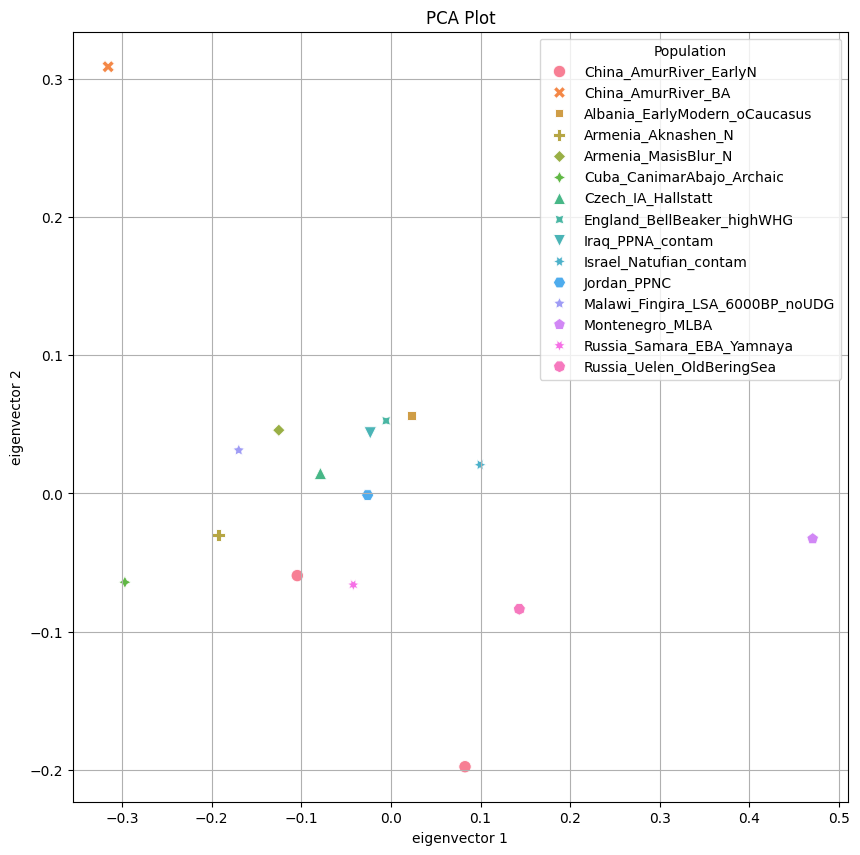

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the files
evec_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.pca.evec")
ind_file = os.path.join(output_dir, "aadr_v54.1.p1_1240K_public_short_50.ind")

# Read the .evec file, skipping the first line and handling whitespace issues
with open(evec_file, 'r') as f:
    lines = f.readlines()

# Skip the first line and split remaining lines into columns
data = []
for line in lines[1:]:
    parts = line.split()
    sample = parts[0]
    pcs = list(map(float, parts[1:-1]))
    population = parts[-1]
    data.append([sample] + pcs + [population])

# Create a DataFrame from the parsed data
columns = ['Sample'] + [f'PC{i}' for i in range(1, len(data[0]) - 1)] + ['Population']
evec_df = pd.DataFrame(data, columns=columns)

# Read the .ind file to get the population information
with open(ind_file, 'r') as f:
    lines = f.readlines()

# Parse the .ind file similarly
ind_data = []
for line in lines:
    parts = line.split()
    sample = parts[0]
    sex = parts[1]
    population = parts[2]
    ind_data.append([sample, sex, population])

# Create a DataFrame from the parsed .ind data
ind_df = pd.DataFrame(ind_data, columns=['Sample', 'Sex', 'Population'])

# Merge the DataFrames on the Sample column
merged_df = pd.merge(evec_df, ind_df[['Sample', 'Population']], on='Sample')

# Drop one of the duplicate Population columns
merged_df = merged_df.drop(columns=['Population_y']).rename(columns={'Population_x': 'Population'})

# Plot the first two principal components using Seaborn
plt.figure(figsize=(10, 10))

# Adjusting the axis limits and markers to match the example plot
sns.scatterplot(
    data=merged_df, 
    x='PC1', 
    y='PC2', 
    hue='Population', 
    style='Population', 
    s=80, 
    alpha=0.9
)

plt.xlabel('eigenvector 1')
plt.ylabel('eigenvector 2') 
plt.title('PCA Plot')
plt.legend(title='Population', loc='upper right')
plt.grid(True)
plt.show()
